In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time, os
import json

In [3]:
from types import SimpleNamespace

In [40]:
import statistics

In [189]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [200]:
import seaborn as sns



# retrieving data from steamspy api

first attempt at pulling data and transforming it into a dataframe. then can use number of game sales as new target

In [100]:
response = requests.get('http://steamspy.com/api.php?request=all&page=44')

In [101]:
response

<Response [200]>

In [27]:
json.load(response.json())

AttributeError: 'dict' object has no attribute 'read'

In [8]:
#response = requests.get('http://steamspy.com/api.php?request=all&page=1')

In [9]:
response

<Response [200]>

In [5]:
list = response.json()

In [35]:
json.loads(list)

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [38]:
x = json.loads(response, object_hook=lambda d: SimpleNamespace(**d))

TypeError: the JSON object must be str, bytes or bytearray, not Response

In [105]:
df = pd.DataFrame(list).T

In [12]:
num1 = try1.iloc[0]['owners']

In [13]:
num1

'100,000,000 .. 200,000,000'

In [18]:
num1.strip()

'100,000,000 .. 200,000,000'

In [20]:
num1.split()

['100,000,000', '..', '200,000,000']

In [36]:
listz = num1.replace(',','').split()

In [37]:
listz.remove(listz[1])

In [42]:
for items in listz:
    items = int(items)

In [41]:
statistics.median(listz)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [45]:
listz[0] = int(listz[0])

In [46]:
listz

[100000000, '200000000']

In [78]:
# def medianator (raw):
#     temp = []
#     raw2 = raw.split()
#     raw3 = raw2.remove(raw2[1])
#     for items in raw3:
#         temp.append(int(items))
#     print(temp)
#     return statistics.median(temp)

In [79]:
medianator(num1)

TypeError: 'NoneType' object is not iterable

In [54]:
num1

'100,000,000 .. 200,000,000'

In [55]:
AHH = [100000000, 200000000]

In [56]:
statistics.median(AHH)

150000000.0

In [70]:
ahh = ['1000000','2000000']

In [63]:
for items in ahh:
    ahh[items] = int(items)

TypeError: list indices must be integers or slices, not str

In [72]:
nums = list(map(int,ahh))

TypeError: 'list' object is not callable

In [69]:
ahh

In [92]:
num1.replace(',','').replace('.','').split()

['100000000', '200000000']

In [74]:
ahh

['1000000', '2000000']

In [75]:
nums = [int(s) for s in ahh]

In [77]:
statistics.median(nums)

1500000.0

In [83]:
num1.remove(num1.split()[1])

AttributeError: 'str' object has no attribute 'remove'

In [87]:
num1

'100,000,000 .. 200,000,000'

# MEDIANATOR
this function will be able to get median number for games sold, once all pages are scraped

In [93]:
def medianator (raw):
    raw2 = (raw.replace(',','').replace('.','').split())
    nums = [int(s) for s in raw2]
    return statistics.median(nums)

In [94]:
medianator(num1)

150000000.0

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1257359,235742,0,"100,000,000 .. 200,000,000",35610,1979,1142,1038,0,0,0,590053
578080,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,927347,784222,0,"50,000,000 .. 100,000,000",26222,669,11437,275,1499,2999,50,382408
440,440,Team Fortress 2,Valve,Valve,,728878,46735,0,"50,000,000 .. 100,000,000",8057,1108,375,186,0,0,0,82055
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,4867165,656509,0,"50,000,000 .. 100,000,000",31692,1023,7483,369,0,0,0,988108
304930,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,,393567,37603,0,"20,000,000 .. 50,000,000",8343,4976,322,2360,0,0,0,26381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094520,1094520,Sands of Salzaar,汉家松鼠Han-Squirrel Studio,X.D. Network Inc.,,12716,1745,0,"500,000 .. 1,000,000",820,0,436,0,1199,1499,20,490
333600,333600,NEKOPARA Vol. 1,NEKO WORKs,Sekai Project,,22041,1004,0,"500,000 .. 1,000,000",2761,63,136,89,399,999,60,228
450390,450390,The Lab,Valve,Valve,,4470,223,0,"500,000 .. 1,000,000",76,0,36,0,0,0,0,63
288470,288470,Fable Anniversary,Lionhead Studios,Xbox Game Studios,,7201,1442,0,"500,000 .. 1,000,000",1072,0,611,0,3499,3499,0,318


# Creating loop for all pages
44 pages, will take 44 minutes since I have to include a 60 second wait per API request

In [116]:
for i in range(44):
    response = requests.get(f'http://steamspy.com/api.php?request=all&page={i}')
    list = response.json()
    df = pd.concat([df,(pd.DataFrame(list).T)])
    time.sleep(60)
    
    
    


In [117]:
df.shape

(46999, 17)

In [107]:
try1.shape

(1000, 17)

In [109]:
try2 = pd.concat([df,try1])

In [110]:
try2.shape

(2000, 17)

In [119]:
df.drop_duplicates(inplace=True)

In [126]:
df.rename(columns={'name':'title'},inplace=True)

In [120]:
df.head(1)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1257359,235742,0,"100,000,000 .. 200,000,000",35610,1979,1142,1038,0,0,0,590053


In [121]:
df['owners_median'] = df.owners.map(medianator)

In [128]:
df.head()

,appid,title,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,owners_median
570,570,Dota 2,Valve,Valve,,1257359,235742,0,"100,000,000 .. 200,000,000",35610,1979,1142,1038,0,0,0,590053,150000000.0
578080,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,927347,784222,0,"50,000,000 .. 100,000,000",26222,669,11437,275,1499,2999,50,382408,75000000.0
440,440,Team Fortress 2,Valve,Valve,,728878,46735,0,"50,000,000 .. 100,000,000",8057,1108,375,186,0,0,0,82055,75000000.0
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,4867165,656509,0,"50,000,000 .. 100,000,000",31692,1023,7483,369,0,0,0,988108,75000000.0
304930,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,,393567,37603,0,"20,000,000 .. 50,000,000",8343,4976,322,2360,0,0,0,26381,35000000.0


In [123]:
reviewsdf = pd.read_csv('data/reviewsdf.csv')

In [134]:
reviewsdf.shape

(5793, 92)

In [224]:
solddf = pd.merge(reviewsdf,df[['title','owners_median','positive','negative']], on=['title'])

In [225]:
solddf.head(1)

,title,link,release_date,been_sale,orig_price,num_reviews,review_rating,num_languages,tags,num_tags,...,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild,owners_median,positive,negative
0,OUTRIDERS,https://store.steampowered.com/app/680420/OUTR...,2021-04-01 00:00:00,0,59.99,36837,Mixed,13.0,"['RPG', 'Action', 'Adventure', 'Co-op', 'Third...",20.0,...,0,1,0,0,0,0,0,1500000.0,26922,14940


In [138]:
cols = list(solddf.columns)

TypeError: 'dict' object is not callable

In [226]:
solddf.columns

Index(['title', 'link', 'release_date', 'been_sale', 'orig_price',
       'num_reviews', 'review_rating', 'num_languages', 'tags', 'num_tags',
       'genres', 'num_genres', 'publisher', 'year_released',
       'languages_filled', 'top_pubs', 'rating_val', 'Singleplayer_tag',
       'Indie_tag', 'Action_tag', 'Adventure_tag', 'Casual_tag',
       'Strategy_tag', 'Multiplayer_tag', 'RPG_tag', 'Simulation_tag',
       'Atmospheric_tag', 'Horror_tag', '2D_tag', 'Soundtrack_tag',
       'Great_tag', 'Story_tag', 'Rich_tag', 'World_tag', 'Shooter_tag',
       'Puzzle_tag', 'TurnBased_tag', 'Open_tag', 'FirstPerson_tag',
       'Survival_tag', 'Fantasy_tag', 'Funny_tag', 'Coop_tag',
       'Platformer_tag', 'Early_tag', 'Access_tag', 'Sim_tag', 'Indie_genre',
       'Action_genre', 'Adventure_genre', 'Casual_genre', 'Simulation_genre',
       'Strategy_genre', 'RPG_genre', '_genre', 'Early_genre', 'Access_genre',
       'Games_genre', 'Sports_genre', 'Racing_genre', 'Studios_genre',
       '

In [204]:
solddf.to_csv(r'/Users/michaelharnett/Desktop\owneddf.csv', index=False)

In [154]:
cols = solddf.columns.tolist()

In [227]:
solddf.drop(columns=['link', 'release_date', 'review_rating',
                     'num_languages', 'tags', 'genres','publisher',
                     'top_pubs'], inplace=True)

In [229]:
solddf.columns

Index(['title', 'been_sale', 'orig_price', 'num_reviews', 'num_tags',
       'num_genres', 'year_released', 'languages_filled', 'rating_val',
       'Singleplayer_tag', 'Indie_tag', 'Action_tag', 'Adventure_tag',
       'Casual_tag', 'Strategy_tag', 'Multiplayer_tag', 'RPG_tag',
       'Simulation_tag', 'Atmospheric_tag', 'Horror_tag', '2D_tag',
       'Soundtrack_tag', 'Great_tag', 'Story_tag', 'Rich_tag', 'World_tag',
       'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag', 'Open_tag',
       'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag', 'Funny_tag',
       'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag', 'Sim_tag',
       'Indie_genre', 'Action_genre', 'Adventure_genre', 'Casual_genre',
       'Simulation_genre', 'Strategy_genre', 'RPG_genre', '_genre',
       'Early_genre', 'Access_genre', 'Games_genre', 'Sports_genre',
       'Racing_genre', 'Studios_genre', 'Entertainment_genre',
       'Massively_genre', 'Multiplayer_genre', 'Studio_genre',
       'Interactive_genre', 'I

In [241]:
cols = solddf.columns.tolist()

In [242]:
cols.insert(4, cols.pop(cols.index('num_reviews')))

In [243]:
solddf = solddf[cols]

In [295]:
owneddf = solddf
owneddf.positive = owneddf.positive.astype(int)

In [296]:
owneddf.negative = owneddf.negative.astype(int)

In [297]:
X, y = solddf.iloc[:,2:], solddf.iloc[:,1]

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [299]:
lr = LinearRegression()

In [300]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8022891436226546

In [301]:
lr.score(X_val, y_val)

0.7627808489864945

In [302]:
lr.score(X_test, y_test)

0.894616053309204

In [303]:
train_preds = lr.predict(X_train)

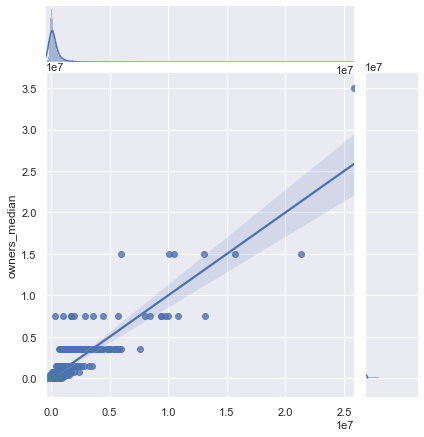

In [304]:
sns.jointplot(x=train_preds,y=y_train, kind='reg')

In [305]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
print(rmse)
mae = mean_absolute_error(y_train, train_preds)
print(mae)

543242.059534339
220912.8331997724


In [260]:
# lr.fit(X,y)
# lr.score(X,y)

0.870149443214358

In [306]:
owneddf.corr()

,owners_median,positive,negative,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
owners_median,1.000000,0.901520,0.712095,0.899763,-0.047430,0.096591,0.162500,0.002131,-0.194398,0.087756,...,0.015933,0.039023,0.016020,-0.018557,0.019136,0.002951,0.015807,-0.012249,-0.042996,0.001988
positive,0.901520,1.000000,0.614339,0.944267,-0.050414,0.117285,0.159292,0.013264,-0.112912,0.117730,...,0.004677,0.040404,0.005714,-0.016910,0.003861,-0.006539,0.005969,-0.012946,-0.023070,-0.004318
negative,0.712095,0.614339,1.000000,0.769682,-0.018396,0.073311,0.056856,0.008661,-0.019300,0.041107,...,0.001525,0.013237,-0.000381,-0.006290,0.005194,-0.001218,0.001250,-0.004560,-0.011547,-0.001674
num_reviews,0.899763,0.944267,0.769682,1.000000,-0.045369,0.115926,0.140958,0.016061,-0.092892,0.114919,...,0.003238,0.034384,0.003899,-0.015010,0.003992,-0.005584,0.004822,-0.011430,-0.019794,-0.004035
been_sale,-0.047430,-0.050414,-0.018396,-0.045369,1.000000,-0.070012,-0.003522,0.044925,0.040221,-0.003602,...,-0.011040,-0.034241,-0.034241,-0.036623,-0.037535,0.007921,-0.024515,0.180420,-0.040721,0.161789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THQ Nordic,0.002951,-0.006539,-0.001218,-0.005584,0.007921,0.048435,-0.012864,0.018930,-0.065605,-0.025071,...,-0.006746,-0.007171,-0.007171,-0.007670,-0.007861,1.000000,-0.005134,-0.006524,-0.281035,-0.006855
Ubisoft,0.015807,0.005969,0.001250,0.004822,-0.024515,0.008554,0.011637,-0.036875,-0.091393,-0.003508,...,-0.004574,-0.004862,-0.004862,-0.005200,-0.005330,-0.005134,1.000000,-0.004423,-0.190538,-0.004648
Winged Cloud,-0.012249,-0.012946,-0.004560,-0.011430,0.180420,-0.023468,-0.029362,-0.022173,-0.000461,-0.000026,...,-0.005812,-0.006178,-0.006178,-0.006608,-0.006772,-0.006524,-0.004423,1.000000,-0.242106,-0.005905
other,-0.042996,-0.023070,-0.011547,-0.019794,-0.040721,-0.121987,-0.015992,0.038982,0.183825,0.080890,...,-0.250364,-0.266130,-0.266130,-0.284643,-0.291729,-0.281035,-0.190538,-0.242106,1.000000,-0.254395


In [314]:
solddf.corr()

,owners_median,positive,negative,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,languages_filled,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
owners_median,1.000000,0.901520,0.712095,0.899763,-0.047430,0.096591,0.162500,0.002131,-0.194398,0.087756,...,0.015933,0.039023,0.016020,-0.018557,0.019136,0.002951,0.015807,-0.012249,-0.042996,0.001988
positive,0.901520,1.000000,0.614339,0.944267,-0.050414,0.117285,0.159292,0.013264,-0.112912,0.117730,...,0.004677,0.040404,0.005714,-0.016910,0.003861,-0.006539,0.005969,-0.012946,-0.023070,-0.004318
negative,0.712095,0.614339,1.000000,0.769682,-0.018396,0.073311,0.056856,0.008661,-0.019300,0.041107,...,0.001525,0.013237,-0.000381,-0.006290,0.005194,-0.001218,0.001250,-0.004560,-0.011547,-0.001674
num_reviews,0.899763,0.944267,0.769682,1.000000,-0.045369,0.115926,0.140958,0.016061,-0.092892,0.114919,...,0.003238,0.034384,0.003899,-0.015010,0.003992,-0.005584,0.004822,-0.011430,-0.019794,-0.004035
been_sale,-0.047430,-0.050414,-0.018396,-0.045369,1.000000,-0.070012,-0.003522,0.044925,0.040221,-0.003602,...,-0.011040,-0.034241,-0.034241,-0.036623,-0.037535,0.007921,-0.024515,0.180420,-0.040721,0.161789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THQ Nordic,0.002951,-0.006539,-0.001218,-0.005584,0.007921,0.048435,-0.012864,0.018930,-0.065605,-0.025071,...,-0.006746,-0.007171,-0.007171,-0.007670,-0.007861,1.000000,-0.005134,-0.006524,-0.281035,-0.006855
Ubisoft,0.015807,0.005969,0.001250,0.004822,-0.024515,0.008554,0.011637,-0.036875,-0.091393,-0.003508,...,-0.004574,-0.004862,-0.004862,-0.005200,-0.005330,-0.005134,1.000000,-0.004423,-0.190538,-0.004648
Winged Cloud,-0.012249,-0.012946,-0.004560,-0.011430,0.180420,-0.023468,-0.029362,-0.022173,-0.000461,-0.000026,...,-0.005812,-0.006178,-0.006178,-0.006608,-0.006772,-0.006524,-0.004423,1.000000,-0.242106,-0.005905
other,-0.042996,-0.023070,-0.011547,-0.019794,-0.040721,-0.121987,-0.015992,0.038982,0.183825,0.080890,...,-0.250364,-0.266130,-0.266130,-0.284643,-0.291729,-0.281035,-0.190538,-0.242106,1.000000,-0.254395


<AxesSubplot:>

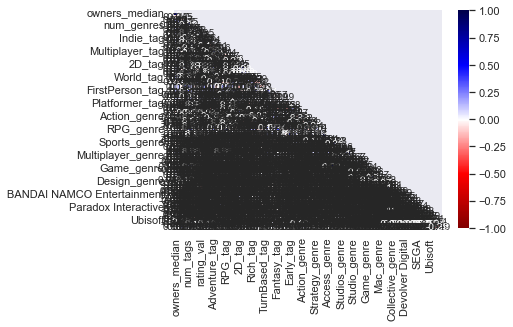

In [203]:
upper = np.triu(solddf.corr())
sns.heatmap(solddf.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)



In [272]:
solddf.head(1)

,title,owners_median,positive,negative,num_reviews,been_sale,orig_price,num_tags,num_genres,year_released,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1500000.0,26922,14940,36837,0,59.99,20.0,3.0,2021,...,0,0,0,0,1,0,0,0,0,0


In [285]:
X, y = owneddf.iloc[:,2:10], owneddf.iloc[:,1]

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [287]:
lr = LinearRegression()

In [288]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7938778271383947

In [289]:
lr.score(X_val, y_val)

0.760219599867621

<AxesSubplot:>

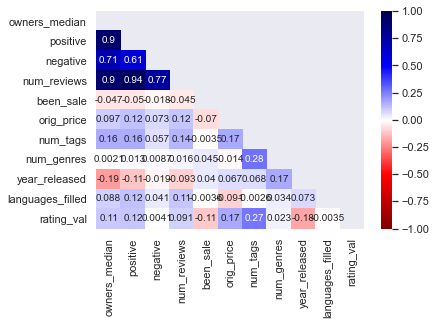

In [308]:
heatmapdf = owneddf.iloc[:,1:12]
upper = np.triu(heatmapdf.corr())
sns.heatmap(heatmapdf.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)



In [221]:
import scipy.stats as stats

In [309]:
def diagnostic_plot(X, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X,y)
    pred = rgr.predict(X)
    
    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

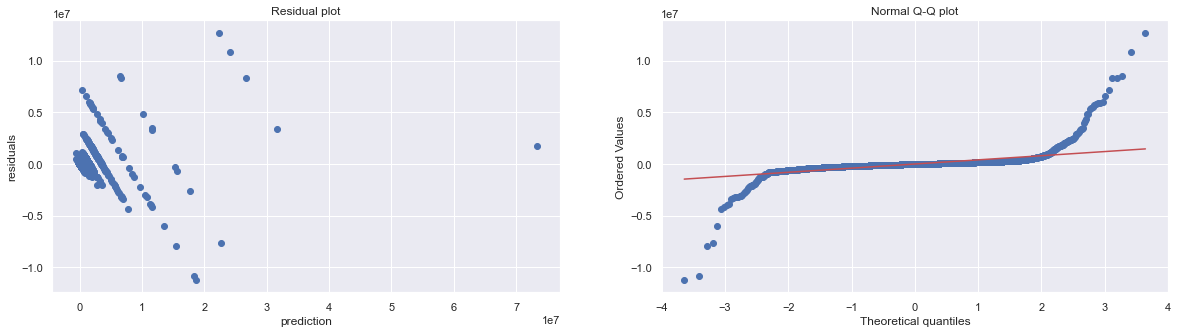

In [310]:
diagnostic_plot(X, y)

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [313]:
vif(owneddf.iloc[:, 2:])

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


positive        13.227376
negative         3.521324
num_reviews     20.264186
been_sale        1.149454
orig_price       1.554122
                  ...    
THQ Nordic       2.645139
Ubisoft          1.760393
Winged Cloud     2.300857
other           17.597415
tinyBuild        2.414074
Length: 85, dtype: float64